# Decision Tree VS Random Forest

# Introduction to this Notebook:

Welcome to this Kaggle Notebook! In this notebook, we'll explore the task of predicting CO2 emissions from vehicles using machine learning algorithms.

# Task Description:

The task involves building predictive models to estimate the CO2 emissions (in grams per kilometer) produced by vehicles based on various features such as engine size, number of cylinders, and fuel consumption.

# Dataset Overview:

The dataset used in this task contains information about vehicles, including their engine size, cylinders, fuel consumption, and CO2 emissions. Each instance in the dataset represents a specific vehicle model.

# Machine Learning Models:

We'll compare the performance of two popular regression algorithms for this task:

Decision Tree Regression: This algorithm builds a decision tree model to predict the target variable (CO2 emissions) based on the input features.
Random Forest Regression: This ensemble learning technique constructs multiple decision trees and averages their predictions to improve accuracy and reduce overfitting.
Evaluation Metric:

To assess the performance of the models, we'll use the root mean squared error (RMSE) metric, which measures the average deviation between the predicted and actual CO2 emissions values.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv('/kaggle/input/co2-emission-by-vehicles/CO2 Emissions_Canada.csv')  # Replace 'your_dataset.csv' with the actual file path


In [3]:
data

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [4]:
# Select features and target
features = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (L/100 km)']
target = 'CO2 Emissions(g/km)'

In [5]:
X = data[features]
y = data[target]

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Model

In [7]:
# Implementing and training Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

# Random Forest Model

In [8]:
# Implementing and training Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Evaulating Both Models

In [9]:
# Evaluate Decision Tree and Random Forest models
dt_rmse = mean_squared_error(y_test, dt_model.predict(X_test), squared=False)
rf_rmse = mean_squared_error(y_test, rf_model.predict(X_test), squared=False)

In [10]:
print("Decision Tree RMSE:", dt_rmse)
print("Random Forest RMSE:", rf_rmse)

Decision Tree RMSE: 11.728207649589013
Random Forest RMSE: 10.107835396616828


# Showing results in a bar chart

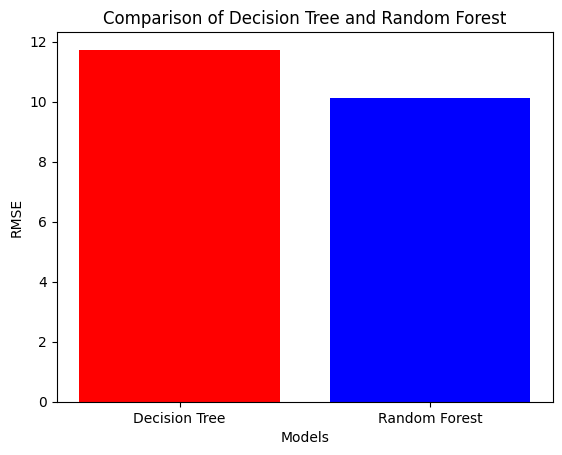

In [11]:
# Plotting comparison
models = ['Decision Tree', 'Random Forest']
rmses = [dt_rmse, rf_rmse]

plt.bar(models, rmses, color=['red', 'blue'])
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Comparison of Decision Tree and Random Forest')
plt.show()